# Esteban Avilés Lino 75525941

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# 1. Análisis Exploratorio de Datos

## 1.1. Código

In [2]:
df = pd.read_csv("RECH6.csv", delimiter=";")
df.head()

,ID1,HHID,HC0,HC1,HC2,HC3,HC4,HC5,HC6,HC7,...,HC60,HC61,HC62,HC63,HC64,HC68,HC70,HC71,HC72,HC73
0,2022,102201,3,31,158,941,7776,76,10299,8797,...,2,3,4,,1,3,37,131,160,155
1,2022,105201,5,56,161,1055,2807,-58,9758,1614,...,2,3,5,129,4,3,-59,-76,-65,-60
2,2022,105301,4,28,122,860,1554,-101,9608,2078,...,1,2,3,81,3,2,-151,-60,29,52
3,2022,108501,5,50,182,1050,5368,9,10038,6915,...,2,3,5,83,3,3,4,62,90,90
4,2022,110301,3,58,230,1120,7514,68,10284,9760,...,2,2,3,,1,2,67,178,194,205


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22424 entries, 0 to 22423
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID1     22424 non-null  int64 
 1   HHID    22424 non-null  int64 
 2   HC0     22424 non-null  int64 
 3   HC1     22424 non-null  int64 
 4   HC2     22424 non-null  int64 
 5   HC3     22424 non-null  int64 
 6   HC4     22424 non-null  int64 
 7   HC5     22424 non-null  int64 
 8   HC6     22424 non-null  int64 
 9   HC7     22424 non-null  int64 
 10  HC8     22424 non-null  int64 
 11  HC9     22424 non-null  int64 
 12  HC10    22424 non-null  int64 
 13  HC11    22424 non-null  int64 
 14  HC12    22424 non-null  int64 
 15  HC13    22424 non-null  int64 
 16  HC15    22424 non-null  object
 17  HC16    22424 non-null  int64 
 18  HC19    22424 non-null  int64 
 19  HC27    22424 non-null  int64 
 20  HC30    22424 non-null  int64 
 21  HC31    22424 non-null  int64 
 22  HC32    22424 non-null

In [4]:
df["HC57"].unique()

array([4, 9, 3, 2, 1], dtype=int64)

<Axes: >

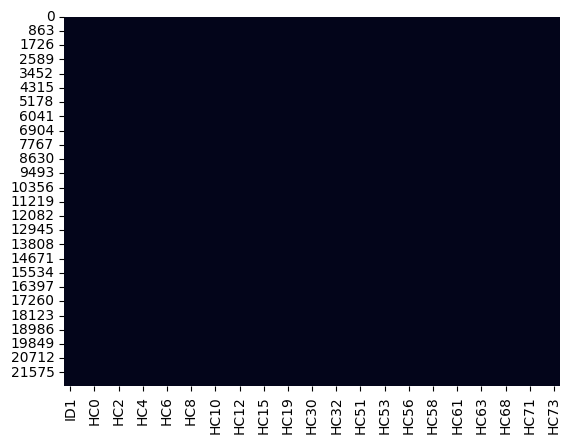

In [5]:
sns.heatmap(df.isnull(), cbar=False)

In [6]:
df.drop("ID1", axis=1, inplace=True)
df.drop("HHID", axis=1, inplace=True)
df.drop("HC0", axis=1, inplace=True)
df.drop("HC13", axis=1, inplace=True)
df.drop("HC15", axis=1, inplace=True)
df.drop("HC16", axis=1, inplace=True)
df.drop("HC19", axis=1, inplace=True)
df.drop("HC30", axis=1, inplace=True)
df.drop("HC31", axis=1, inplace=True)
df.drop("HC32", axis=1, inplace=True)
df.drop("HC33", axis=1, inplace=True)
df.drop("HC51", axis=1, inplace=True)
df.drop("HC52", axis=1, inplace=True)
df.drop("HC58", axis=1, inplace=True)
df.drop("HC60", axis=1, inplace=True)
df.drop("HC61", axis=1, inplace=True)
df.drop("HC62", axis=1, inplace=True)
df.drop("HC63", axis=1, inplace=True)
df.drop("HC64", axis=1, inplace=True)
df.drop("HC68", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22424 entries, 0 to 22423
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   HC1     22424 non-null  int64
 1   HC2     22424 non-null  int64
 2   HC3     22424 non-null  int64
 3   HC4     22424 non-null  int64
 4   HC5     22424 non-null  int64
 5   HC6     22424 non-null  int64
 6   HC7     22424 non-null  int64
 7   HC8     22424 non-null  int64
 8   HC9     22424 non-null  int64
 9   HC10    22424 non-null  int64
 10  HC11    22424 non-null  int64
 11  HC12    22424 non-null  int64
 12  HC27    22424 non-null  int64
 13  HC53    22424 non-null  int64
 14  HC55    22424 non-null  int64
 15  HC56    22424 non-null  int64
 16  HC57    22424 non-null  int64
 17  HC70    22424 non-null  int64
 18  HC71    22424 non-null  int64
 19  HC72    22424 non-null  int64
 20  HC73    22424 non-null  int64
dtypes: int64(21)
memory usage: 3.6 MB


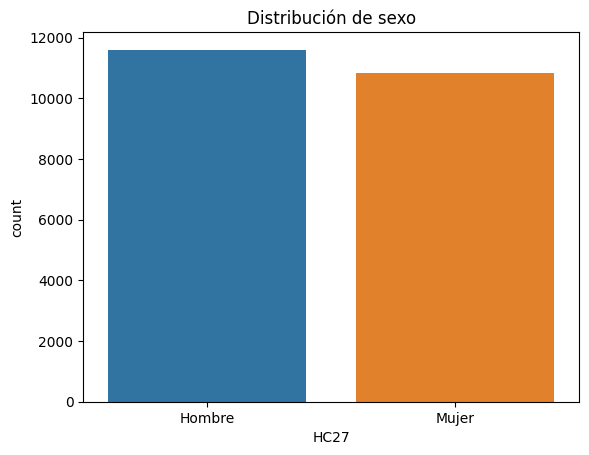

In [7]:
sns.countplot(x="HC27", data=df).set(title="Distribución de sexo", xticklabels=["Hombre", "Mujer"])
plt.show()

[Text(0.5, 1.0, 'Distribución de niveles de anemia'),
 [Text(0, 0, 'Grave'),
  Text(1, 0, 'Moderado'),
  Text(2, 0, 'Leve'),
  Text(3, 0, 'Sin anemia'),
  Text(4, 0, 'No medido')]]

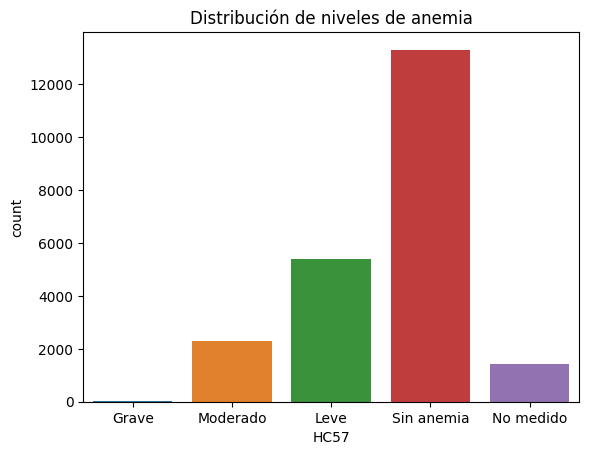

In [8]:
sns.countplot(x="HC57", data=df).set(title="Distribución de niveles de anemia", xticklabels=[
    "Grave",
    "Moderado",
    "Leve",
    "Sin anemia",
    "No medido"
])

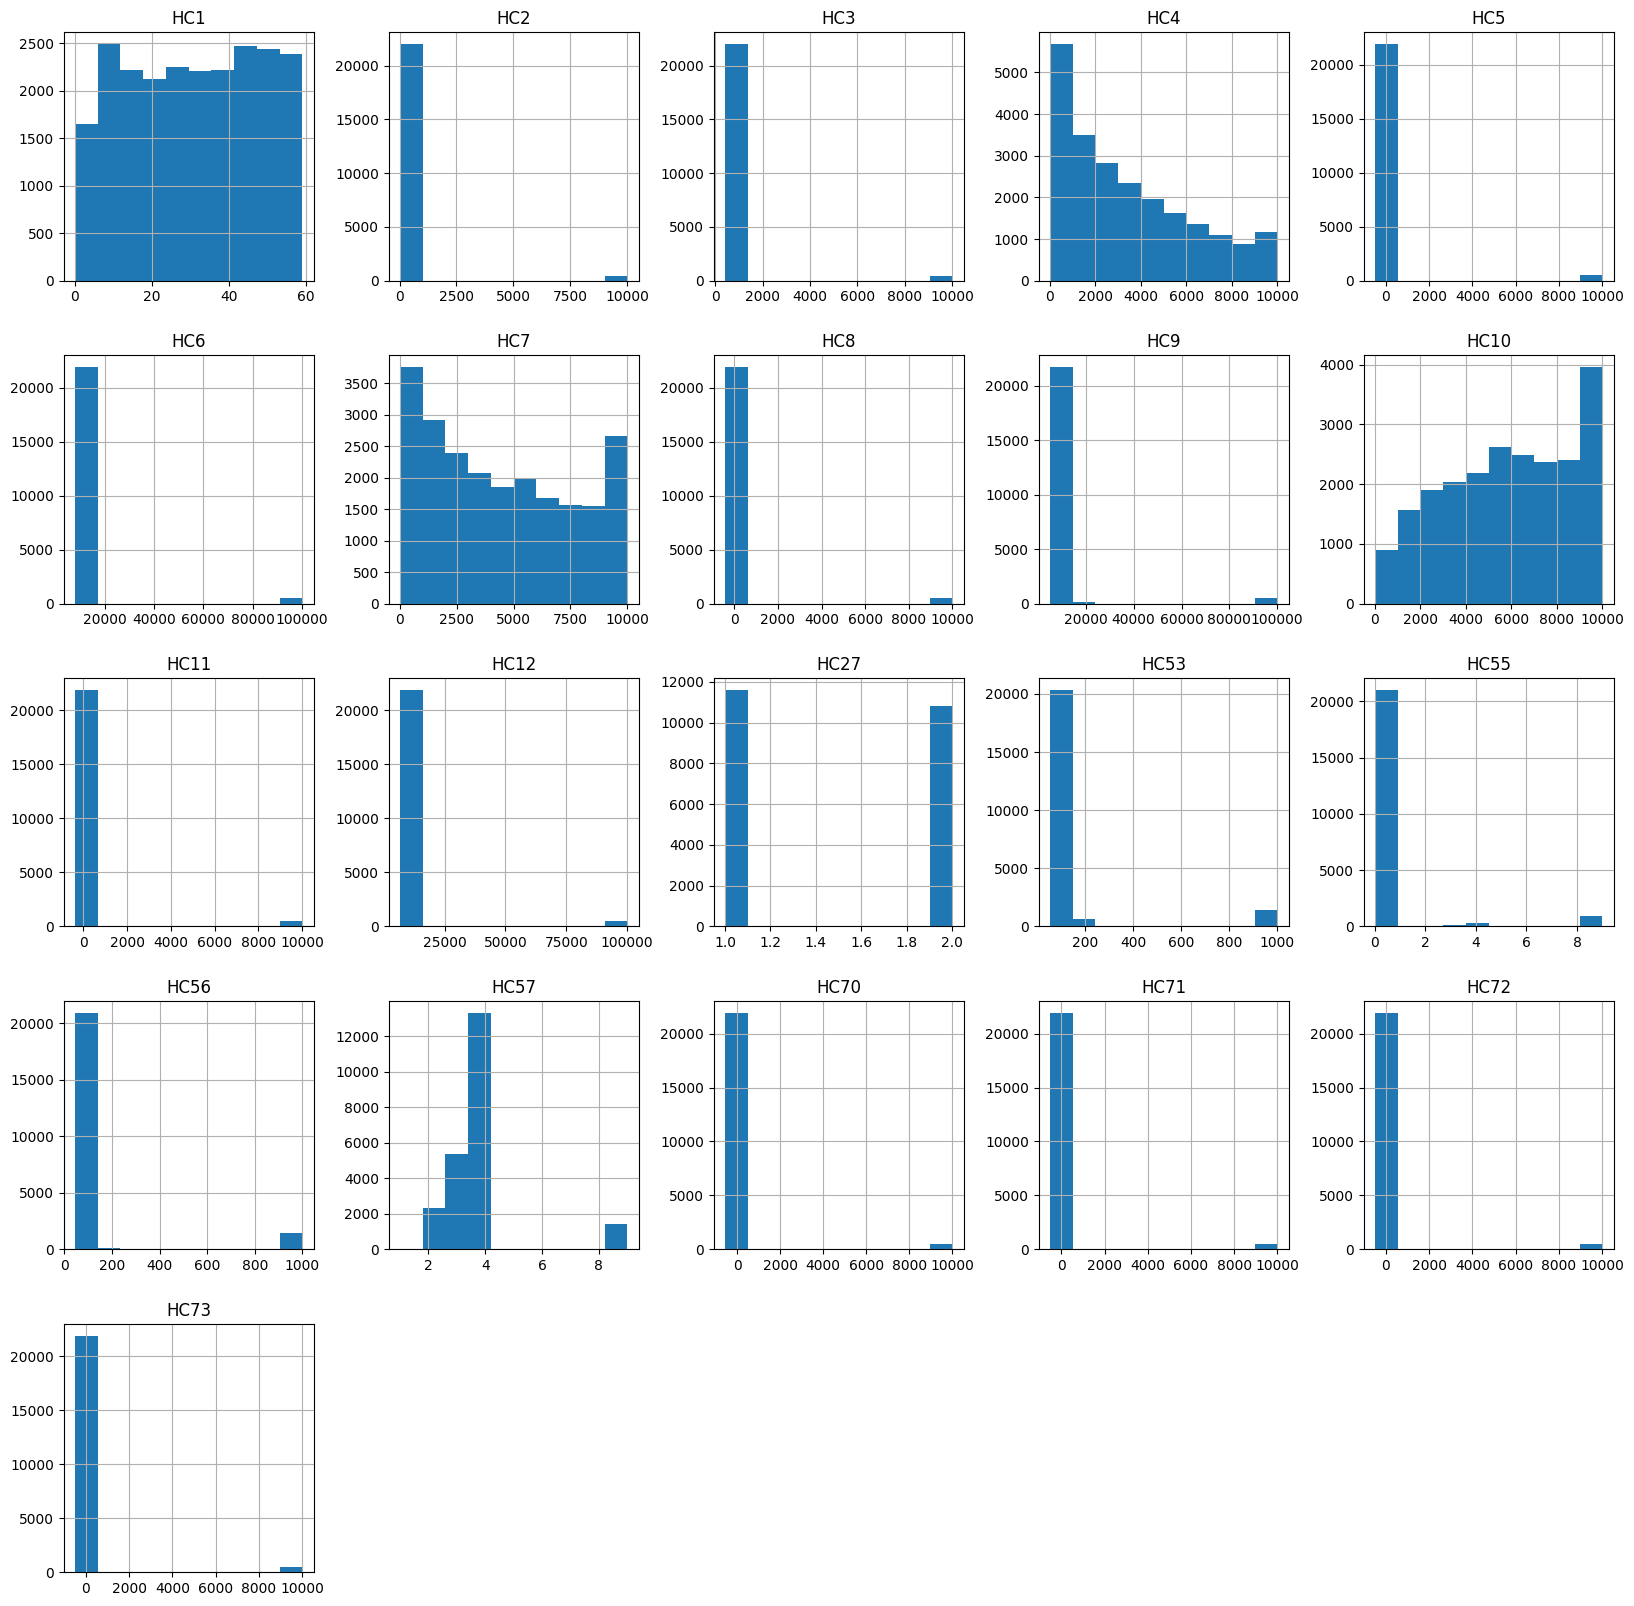

In [9]:
df.hist(figsize=(20, 20))
plt.title("Distribución de variables numéricas")
plt.show()

# 1.2. Explicación breve del código

Se siguieron los siguientes pasos para el análisis exploratorio de datos:
- Primero se cargó el dataset y se observaron las primeras 5 muestras. Este es un dataset que consiste en datos demográficos y de salud para niños menores de 5 años para el estudio de la anemia. Mayor información sobre las variables se encuentra en el pdf "Diccionario - RECH6.pdf" adjunto.
- Luego se verificó la información completa del dataset, entre ellos, los tipos de variables, número de muestras, número de características, etc. Se ve que calaramente hay 34 variables numéricas y 7 variables tipo objeto para un total de 22424 muestras y 41 variables.
- Se escogió que las etiquetas o clases sean los niveles de anemia observados en los diferentes niños, por lo que se valida los valores únicos de esta variable. Se observa que hay escalas del 1 al 4, donde 1 es grave, 2 moderado, 3 leve y 4 sin anemia. Por otro lado, el número 9 parece ser que son las muestras que no contienen un nivel conocido de anemia.
- Se verificó la existencia de valores faltantes en el dataset, según el gráfico, no hay.
- Se eliminaron 20 variables del dataset, pues era información que no tenía valor para el objetivo de clasificar entre diferentes niveles de anemia. Algunas de estas características incluyen el año donde se realizó la encuesta, identificación del cuestionario individual, número de orden en el hogar, etc.
- Se realizó un gráfico de countplot para ver la distribución de sexos en el dataset, hay una cantidad similar de ambos sexos en la investigación.
- Se realizó un gráfico de countplot para ver la distribución de las clases en el dataset, hay un claro desbalance de clases pues hay una gran cantidad de niños sin anemia comparado con los niños con anemia leve o moderada. Para este trabajo no se considerará el nivel grave pues tiene una cantidad muy pequeña de muestras y tampoco se usarán los niveles de anemia no medidos.
- Se realizó el histograma de las variables del dataset, se evidencia una clara necesidad de limpieza de datos, pues algunas muestras están marcadas con variables 9998, por lo que deben ser limpiadas para observar correctamente el histograma.

# 2. Preprocesamiento de los datos

## 2.1. Código

In [10]:
df = df[df["HC2"] < 2000]
df = df[df["HC3"] < 2000]
df = df[df["HC4"] != 9998]
df = df[df["HC5"] != 9998]
df = df[df["HC6"] != 9998]
df = df[df["HC7"] != 9998]
df = df[df["HC8"] != 9998]
df = df[df["HC9"] != 9998]
df = df[df["HC10"] != 9998]
df = df[df["HC11"] != 9998]
df = df[df["HC12"] != 9998]
df.shape

(21861, 21)

In [11]:
df["HC2"] = df["HC2"] / 10
df["HC3"] = df["HC3"] / 10
df["HC4"] = df["HC4"] / 100
df["HC5"] = df["HC5"] / 100
df["HC6"] = df["HC6"] / 100
df["HC7"] = df["HC7"] / 100
df["HC8"] = df["HC8"] / 100
df["HC9"] = df["HC9"] / 100
df["HC10"] = df["HC10"] / 100
df["HC11"] = df["HC11"] / 100
df["HC12"] = df["HC12"] / 100
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21861 entries, 0 to 22423
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HC1     21861 non-null  int64  
 1   HC2     21861 non-null  float64
 2   HC3     21861 non-null  float64
 3   HC4     21861 non-null  float64
 4   HC5     21861 non-null  float64
 5   HC6     21861 non-null  float64
 6   HC7     21861 non-null  float64
 7   HC8     21861 non-null  float64
 8   HC9     21861 non-null  float64
 9   HC10    21861 non-null  float64
 10  HC11    21861 non-null  float64
 11  HC12    21861 non-null  float64
 12  HC27    21861 non-null  int64  
 13  HC53    21861 non-null  int64  
 14  HC55    21861 non-null  int64  
 15  HC56    21861 non-null  int64  
 16  HC57    21861 non-null  int64  
 17  HC70    21861 non-null  int64  
 18  HC71    21861 non-null  int64  
 19  HC72    21861 non-null  int64  
 20  HC73    21861 non-null  int64  
dtypes: float64(11), int64(10)
memory us

In [12]:
df = df[df["HC55"] == 0]
df.drop("HC55", axis=1, inplace=True)
df.shape

(20908, 20)

In [13]:
df["HC53"] = df["HC53"] / 10
df["HC56"] = df["HC56"] / 10
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20908 entries, 0 to 22423
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HC1     20908 non-null  int64  
 1   HC2     20908 non-null  float64
 2   HC3     20908 non-null  float64
 3   HC4     20908 non-null  float64
 4   HC5     20908 non-null  float64
 5   HC6     20908 non-null  float64
 6   HC7     20908 non-null  float64
 7   HC8     20908 non-null  float64
 8   HC9     20908 non-null  float64
 9   HC10    20908 non-null  float64
 10  HC11    20908 non-null  float64
 11  HC12    20908 non-null  float64
 12  HC27    20908 non-null  int64  
 13  HC53    20908 non-null  float64
 14  HC56    20908 non-null  float64
 15  HC57    20908 non-null  int64  
 16  HC70    20908 non-null  int64  
 17  HC71    20908 non-null  int64  
 18  HC72    20908 non-null  int64  
 19  HC73    20908 non-null  int64  
dtypes: float64(13), int64(7)
memory usage: 3.3 MB


In [14]:
df = df[df["HC70"] != 9996]
df = df[df["HC70"] != 9997]
df = df[df["HC70"] != 9998]
df["HC70"] = df["HC70"] / 100

df = df[df["HC71"] != 9996]
df = df[df["HC71"] != 9997]
df = df[df["HC71"] != 9998]
df["HC71"] = df["HC71"] / 100

df = df[df["HC72"] != 9996]
df = df[df["HC72"] != 9997]
df = df[df["HC72"] != 9998]
df["HC72"] = df["HC72"] / 100

df = df[df["HC73"] != 9996]
df = df[df["HC73"] != 9997]
df = df[df["HC73"] != 9998]
df["HC73"] = df["HC73"] / 100

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20887 entries, 0 to 22423
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HC1     20887 non-null  int64  
 1   HC2     20887 non-null  float64
 2   HC3     20887 non-null  float64
 3   HC4     20887 non-null  float64
 4   HC5     20887 non-null  float64
 5   HC6     20887 non-null  float64
 6   HC7     20887 non-null  float64
 7   HC8     20887 non-null  float64
 8   HC9     20887 non-null  float64
 9   HC10    20887 non-null  float64
 10  HC11    20887 non-null  float64
 11  HC12    20887 non-null  float64
 12  HC27    20887 non-null  int64  
 13  HC53    20887 non-null  float64
 14  HC56    20887 non-null  float64
 15  HC57    20887 non-null  int64  
 16  HC70    20887 non-null  float64
 17  HC71    20887 non-null  float64
 18  HC72    20887 non-null  float64
 19  HC73    20887 non-null  float64
dtypes: float64(17), int64(3)
memory usage: 3.3 MB


In [15]:
df = df[df["HC57"] > 1]
df.shape

(20859, 20)

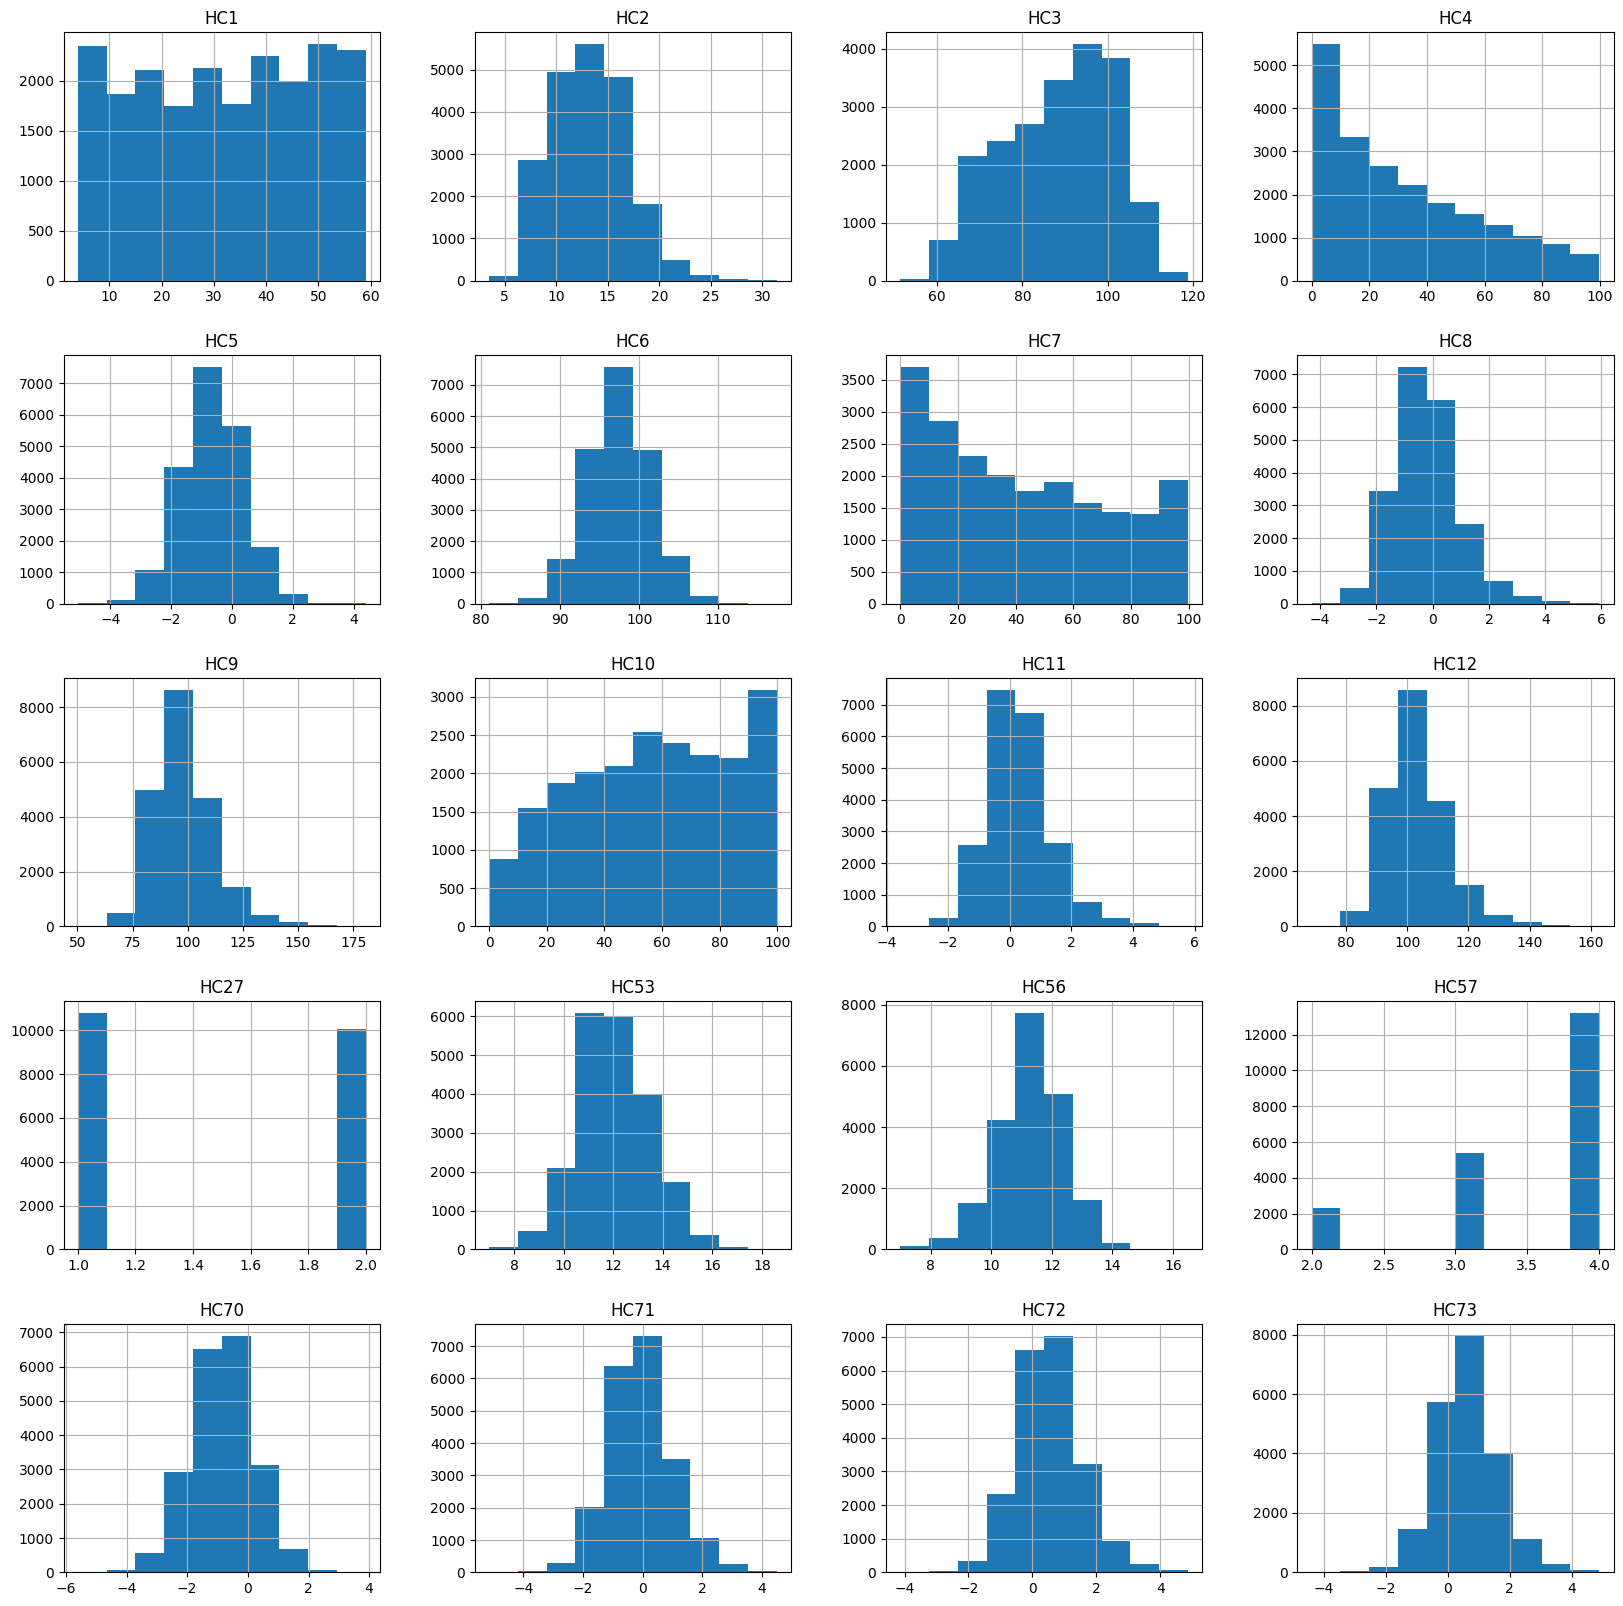

In [16]:
df.hist(figsize=(20, 20))
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20859 entries, 0 to 22423
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HC1     20859 non-null  int64  
 1   HC2     20859 non-null  float64
 2   HC3     20859 non-null  float64
 3   HC4     20859 non-null  float64
 4   HC5     20859 non-null  float64
 5   HC6     20859 non-null  float64
 6   HC7     20859 non-null  float64
 7   HC8     20859 non-null  float64
 8   HC9     20859 non-null  float64
 9   HC10    20859 non-null  float64
 10  HC11    20859 non-null  float64
 11  HC12    20859 non-null  float64
 12  HC27    20859 non-null  int64  
 13  HC53    20859 non-null  float64
 14  HC56    20859 non-null  float64
 15  HC57    20859 non-null  int64  
 16  HC70    20859 non-null  float64
 17  HC71    20859 non-null  float64
 18  HC72    20859 non-null  float64
 19  HC73    20859 non-null  float64
dtypes: float64(17), int64(3)
memory usage: 3.3 MB


In [18]:
X = df.drop(["HC57"], axis=1)
y = df[["HC57"]]
y = y - 2
X.shape, y.shape

((20859, 19), (20859, 1))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15644, 19), (5215, 19), (15644, 1), (5215, 1))

In [20]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled.shape

(20859, 19)

In [21]:
ss2 = StandardScaler()
X_train_scaled = ss2.fit_transform(X_train)
X_test_scaled = ss2.transform(X_test)
X_train.shape, X_test.shape

((15644, 19), (5215, 19))

In [22]:
pca2 = PCA(n_components=2, random_state=42)
X_pca_2 = pca2.fit_transform(X_scaled)
pca3 = PCA(n_components=3, random_state=42)
X_pca_3 = pca3.fit_transform(X_scaled)
X_pca_2.shape, X_pca_3.shape

((20859, 2), (20859, 3))

In [23]:
np.sum(pca2.explained_variance_ratio_), np.sum(pca3.explained_variance_ratio_)

(0.7097870366403392, 0.8408227810303216)

In [24]:
percent_of_variance_explained = 0.95
pca = PCA(n_components=percent_of_variance_explained, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
print(f"{pca.n_components_} principal components are required to explain {percent_of_variance_explained} of the variation in this data.")

5 principal components are required to explain 0.95 of the variation in this data.


In [25]:
X_test_pca = pca.transform(X_test_scaled)
X_train_pca.shape, X_test_pca.shape

((15644, 5), (5215, 5))

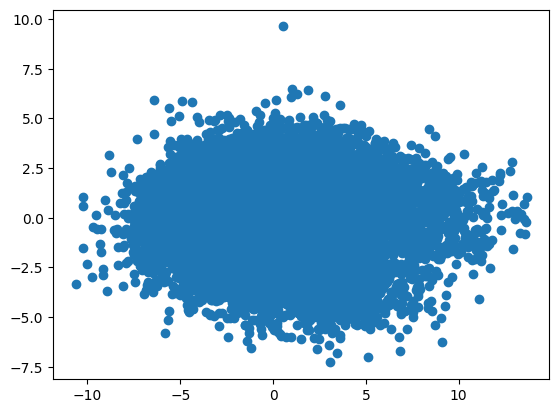

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_pca_2[:, 0], X_pca_2[:, 1])
plt.show()

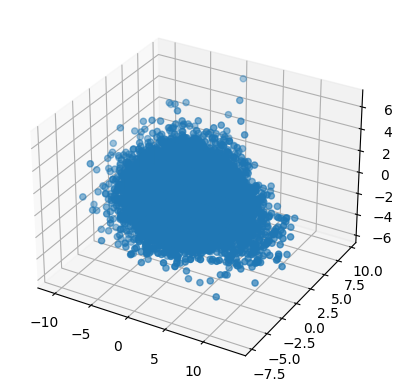

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2])
plt.show()

## 2.2. Explicación breve del código

Se siguieron los siguientes pasos para el pre-procesamiento de datos:
- Primero se eliminaron los outliers claros que se observaron en el histograma, estos son para las variables HC2, HC3, HC4, HC5, HC6, HC7, HC8, HC9, HC10, HC11, y HC12. Algunas de estas variables estaban debidamente documentadas en el pdf adjunto, pero algunos se observaron a partir de los histogramas.
- Luego, las variables HC2 y HC3 corresponden a Peso en kilogramos y altura en centímetros, respectivamente, ambos con 1 decimal, de forma que se dividieron los números enteros entre 10. El mismo procedimiento se realizó para el resto de variables hasta HC12, pues, a pesar que no se menciona en el pdf, contenía valores con 2 decimales para las desviaciones estándar, percentiles, etc.
- Se seleccionaron únicamente aquellos niveles de hemoglobina que fueron medidos (0 según la documentación) y se eliminó esta variable pues no contaba con valor para la clasificación.
- Las variables HC53 y HC56 contaban con un decimal, por lo que se dividieron entre 10 para que sean floats.
- Luego, se realizó el mismo procedimiento para las variables HC70, HC71, HC72 y HC73 según el primer y segundo paso, es decir, se eliminaron los casos marcados extraños y se modifcaron los valores para que sean floats con 2 decimales.
- Además, se conservaron únicamente las clases 2, 3 y 4 pues estos son los únicos que tienen suficientes muestras para la clasificación.
- Se hizo una nueva visualización de los histogramas según el pre-procesamiento de los datos, y vemos mejores distribuciones que antes.
- Se observó la nueva información del dataset, donde algunas de las variables ahora son floats.
- Se separó el dataset entre matriz de características y vector de etiquetas. También se modificaron los valores de las etiquetas para que vayan de 0 a 2.
- Se separó el datast en un set de entrenamiento y otro de testeo, para la clasificación supervisada.
- Se utilizó StandardScaler para normalizar los datos del dataset completo para el aprendizaje no supervisado.
- Se utilizó StandardScaler para normalizar los datos del set de entrenamiento y testeo para el aprendizaje supervisado.
- Luego se utilizó PCA para transformar la data escalada completa en 2 y 3 componentes para la fácil visualización de los clusters.
- Se extrajo la varianza explicada del dataset con 2 y 3 variables, las cuales son menores al 95%.
- Se utilizó PCA para transformar la data escalada de entrenamiento y testeo en el número de componentes necesarios para una varianza explicada del 95%. El número mínimo de componentes es 5. Cabe destacar que se entrenó con el set de entrenamiento y luego se transformó el set de testeo, pues no se debe utilizar el set de testeo por ningún motivo para la clasificación supervisada.
- Se muestra el plot del dataset descompuesto en 2 componentes principales.
- Se muestra el plot del dataset descompuesto en 3 componentes principales.

# 3. Agrupamiento

## 3.1. Código

c:\Users\eavil\anaconda3\envs\patrones\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\eavil\anaconda3\envs\patrones\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\eavil\anaconda3\envs\patrones\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\eavil\anaconda3\envs\patrones\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


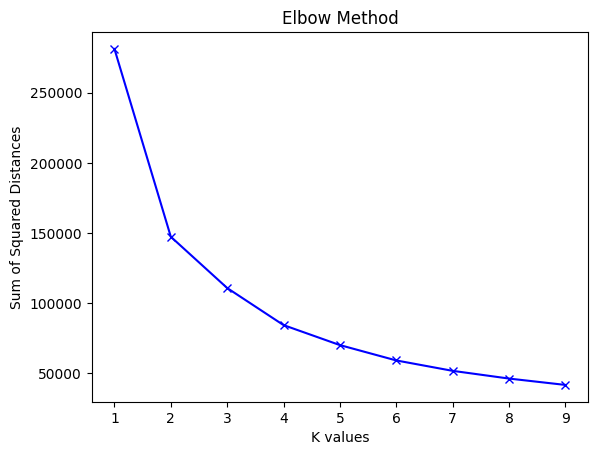

In [28]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k).fit(X_pca_2)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

c:\Users\eavil\anaconda3\envs\patrones\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\eavil\anaconda3\envs\patrones\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\eavil\anaconda3\envs\patrones\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\eavil\anaconda3\envs\patrones\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


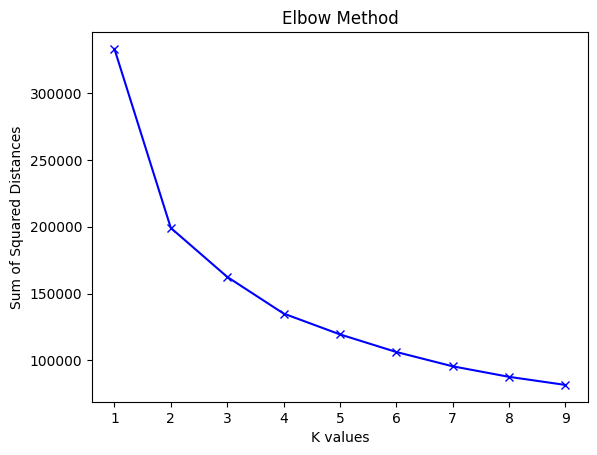

In [29]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k).fit(X_pca_3)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [30]:
model2 = KMeans(n_clusters=3, random_state=42).fit(X_pca_2)
model3 = KMeans(n_clusters=3, random_state=42).fit(X_pca_3)

c:\Users\eavil\anaconda3\envs\patrones\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\eavil\anaconda3\envs\patrones\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


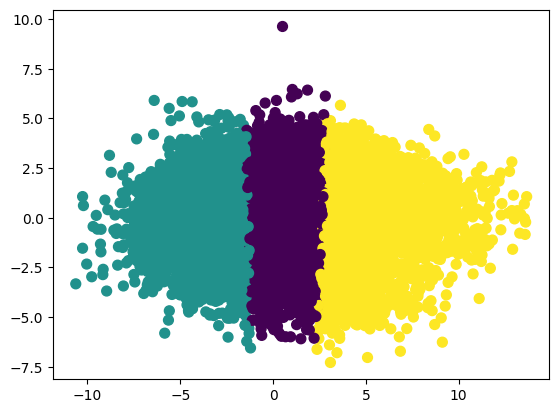

In [31]:
y_kmeans_2 = model2.predict(X_pca_2)
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y_kmeans_2, s=50, cmap="viridis")

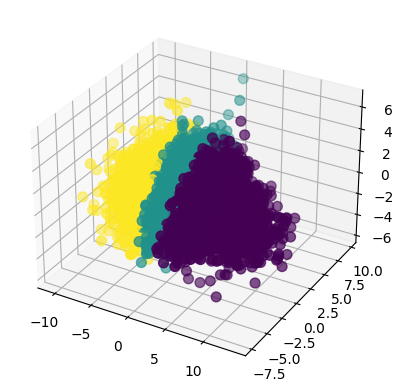

In [32]:
y_kmeans_3 = model3.predict(X_pca_3)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=y_kmeans_3, s=50, cmap="viridis")
plt.show()

## 3.2. Explicación breve del código

Se siguieron los siguientes pasos para el agrupamiento de datos:
- Se buscó el codo para saber el número de clusters que debería tener el modelo con 2 componentes principales. Vemos que no concuerda con lo que sabemos del dataset pues el codo se encuentra aproximadamente en 4 clusters, cuando solo deberían ser 3.
- Se buscó el codo para saber el número de clusters que debería tener el modelo con 3 componentes principales. Se tiene el mismo problema que con el anterior paso, solo deberían ser 3 clusters. Esto puede ser un indicador de que el aprendizaje no supervisado no será suficiente para la clasificación
- Para ambos números de componentes principales se utilizó k=3 para KMeans.
- Finalmente se mostraron los clusters que el algoritmo de agrupamiento obtuvo tanto para 2 como para 3 componentes principales.

# 4. Clasificación

## 4.1. Código

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel="rbf", random_state=42)
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
bagg = BaggingClassifier(random_state=42)
grad = GradientBoostingClassifier(random_state=42)
hist = HistGradientBoostingClassifier(random_state=42)

In [34]:
models = [knn, svm, tree, rf, ada, bagg, grad, hist]
names = ["KNN", "SVM", "DT", "RF", "Ada", "Bagging", "Grad", "Hist"]
acc = list()

In [35]:
for model in models:
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    acc.append(accuracy_score(y_test, y_pred))

c:\Users\eavil\anaconda3\envs\patrones\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\eavil\anaconda3\envs\patrones\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\eavil\AppData\Local\Temp\ipykernel_1888\4096224594.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_pca, y_train)
c:\Users\eavil\anaconda3\envs\patrones\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

In [36]:
performance_df = pd.DataFrame(
    index = ["Acc"],
    columns = names,
    data=[acc]
).T
pd.options.display.precision = 3
performance_df

,Acc
KNN,0.804
SVM,0.843
DT,0.770
RF,0.840
Ada,0.799
Bagging,0.821
Grad,0.829
Hist,0.836


## 4.2. Explicación breve del código

Para la clasificación se realizaron los siguientes pasos:
- Se crearon los modelos KNN, SVM, DT, RF, AdaBoost, Bagging, GradientBoostin, y HistGradientBoosting para la clasificación.
- Se entrenaron cada uno de los modelos con la data de entrenamiento y se evaluó el rendimiento con `accuracy_score`.
- A partir de las precisiones obtenidas, se ve que el mejor modelo de clasificación de entre los usados es SVM con un kernel rbf.

# 5. Métricas y conclusiones

## 5.1. Código

In [37]:
acc2 = accuracy_score(y, y_kmeans_2)
print(acc2)

0.29550793422503474


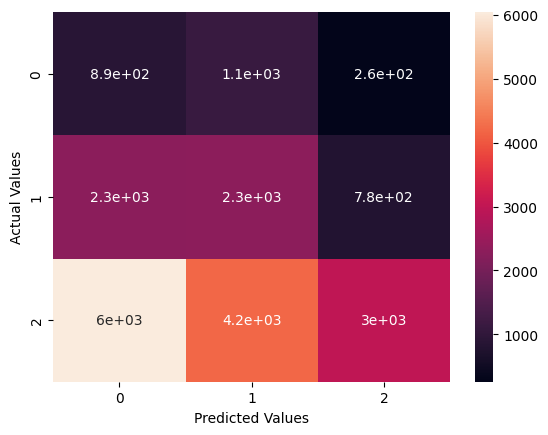

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_kmeans_2)
fig = plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [39]:
acc3 = accuracy_score(y, y_kmeans_3)
print(acc3)

0.32393690972721606


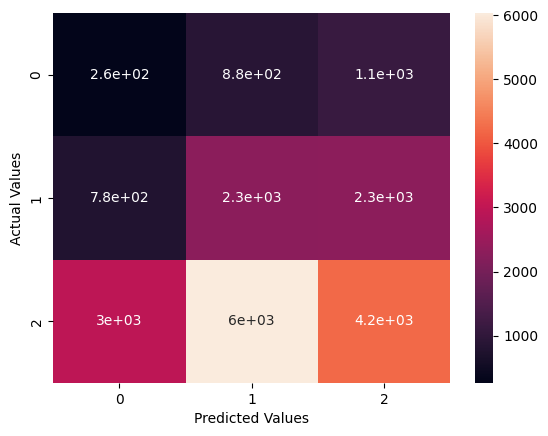

In [40]:
cm = confusion_matrix(y, y_kmeans_3)
fig = plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

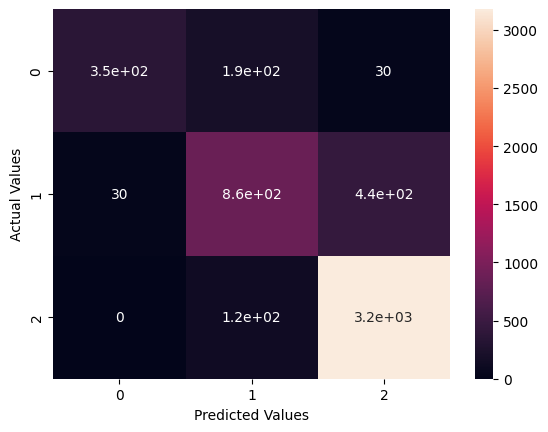

In [41]:
best_model = models[1]
cm = confusion_matrix(y_test, best_model.predict(X_test_pca))
fig = plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [42]:
preds = best_model.predict(X_test_pca)
acc = accuracy_score(y_test, preds)
pre_macro = precision_score(y_test, preds, average="macro")
pre_micro = precision_score(y_test, preds, average="micro")
recall_macro = recall_score(y_test, preds, average="macro")
recall_micro = recall_score(y_test, preds, average="micro")
f1_macro = f1_score(y_test, preds, average="macro")
f1_micro = f1_score(y_test, preds, average="micro")
print(f"Accuracy: {acc*100:.2f}%")
print(f"Macro-averaged Precision: {pre_macro*100:.2f}%")
print(f"Macro-averaged Recall: {recall_macro*100:.2f}%")
print(f"Macro-averaged F1 Score: {f1_macro*100:.2f}%")

Accuracy: 84.30%
Macro-averaged Precision: 84.17%
Macro-averaged Recall: 74.15%
Macro-averaged F1 Score: 77.99%


## 5.2. Explicación breve del código

Con respecto al agrupamiento, se realizaron los siguientes pasos:
- Se obtuvo la precisión del modelo para clasificar entre las 3 clases con 2 componentes principales.
- Se obtuvo la matriz de confusión del modelo para esta misma clasificación con 2 componentes principales.
- Se obtuvo la precisión del modelo para clasificar entre las 3 clases con 3 componentes principales.
- Se obtuvo la matriz de confusión del modelo para esta misma clasificación con 3 componentes principales.

Se observa que el algoritmo de KMeans no tiene buena precisión para la clasificación de estas 3 clases, en su mayoría se confunde mucho y tienen una precisión incluso más baja que una predicción aleatoria, pues la precisión es menor asl 33% para ambos casos. Esto sucede tanto para 2 componentes principales como para 3 componentes principales. Este es un indicador de que el dataset no se puede describir únicamente con 2 o 3 componentes, esto quiere decir que para la clasificación es necesario emplear una mayor cantidad de características. Esto guarda mucha relación con que la varianza explicada de los datasets con 2 y 3 componentes es de el 70.98% y 84.08% respectivamente.

Con respecto a la clasificación, se realizaron los siguientes pasos:
- Se obtuvo la matriz de confusión del mejor modelo obtenido
- Se obtuvo métricas de evaluación tales como Accuracy, Macro-Averaged Precision, Macro-Averaged Recall y Macro-Averaged F1 score.

Para la clasificación se utilizaron 5 componentes principales, las mínimas necesarias para explicar el 95% de la varianza del dataset, en este caso se observa una mejora significativa en cuanto a la clasificación de los datos, pues la precisión es ahora del 84.30%, mucho mejor que una predicción aleatoria. No obstante, el modelo aún tiene un problema para distinguir entre los niveles de anemia leves en comapración con los no anémicos y los moderados, esto puede ser porque la diferencia en las características entre ambas clases son ligeras. También se evidencia un desbalance en la data gracias a lo observado en las puntuaciones de Recall y F1-score, pues el número de pacientes no anémicos es significativamente mayor a los niveles leve o moderado de anemia. Lo observado sugiere que el modelo sería capaz de diferenciar entre un paciente anémico de uno no anémico con una precisión de alrededor del 89% considerando los resultados obtenidos.